In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
wine_data = pd.read_csv('wine.csv')

In [3]:
wine_data.head(5)

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [5]:
wine_data.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [6]:
wine_data.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [7]:
for col in wine_data.select_dtypes(include='number'):
    unique_count = wine_data[col].nunique()
    total_count = len(wine_data[col])
    if unique_count / total_count < 0.09:
        print(f"{col} is likely categorical ({unique_count} unique values out of {total_count})")
    else:
        print(f"{col} is likely NOT categorical ({unique_count} unique values out of {total_count})")

Type is likely categorical (3 unique values out of 178)
Alcohol is likely NOT categorical (126 unique values out of 178)
Malic is likely NOT categorical (133 unique values out of 178)
Ash is likely NOT categorical (79 unique values out of 178)
Alcalinity is likely NOT categorical (63 unique values out of 178)
Magnesium is likely NOT categorical (53 unique values out of 178)
Phenols is likely NOT categorical (97 unique values out of 178)
Flavanoids is likely NOT categorical (132 unique values out of 178)
Nonflavanoids is likely NOT categorical (39 unique values out of 178)
Proanthocyanins is likely NOT categorical (101 unique values out of 178)
Color is likely NOT categorical (132 unique values out of 178)
Hue is likely NOT categorical (78 unique values out of 178)
Dilution is likely NOT categorical (122 unique values out of 178)
Proline is likely NOT categorical (121 unique values out of 178)


In [8]:
x = wine_data.drop("Type", axis = 1)
y = wine_data["Type"]

In [9]:
col = x.select_dtypes(include='number').columns
col

Index(['Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')

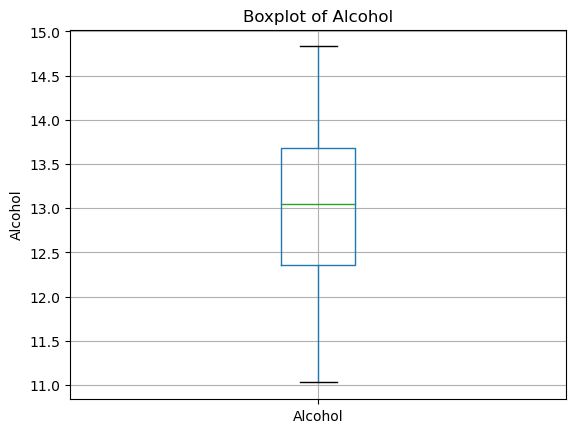

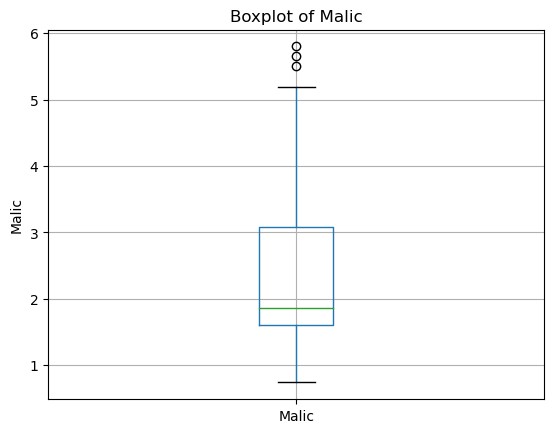

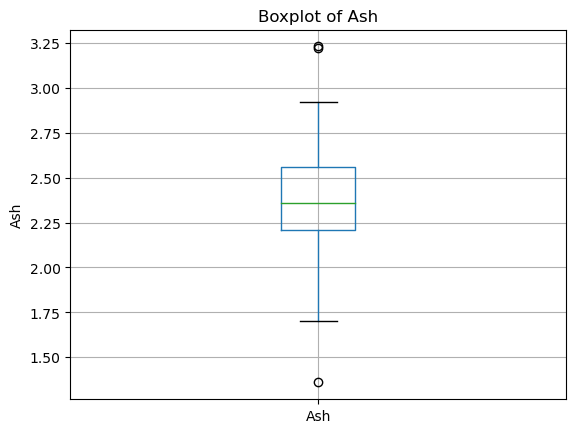

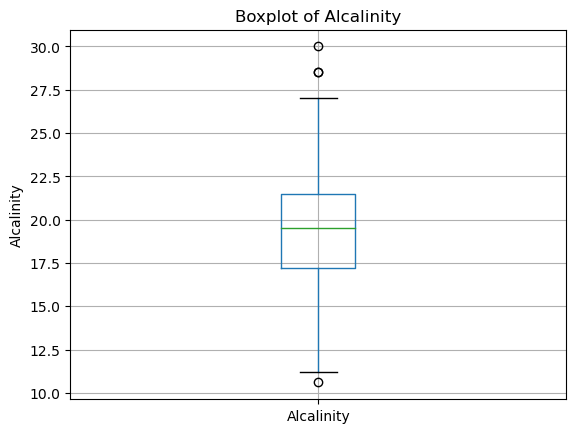

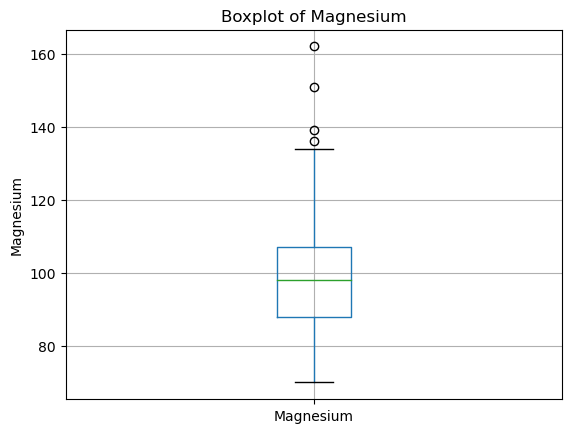

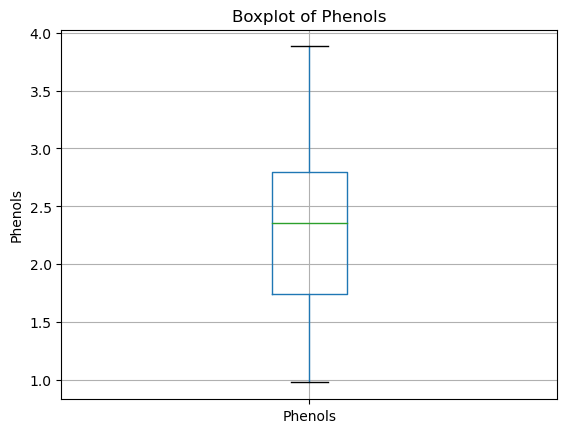

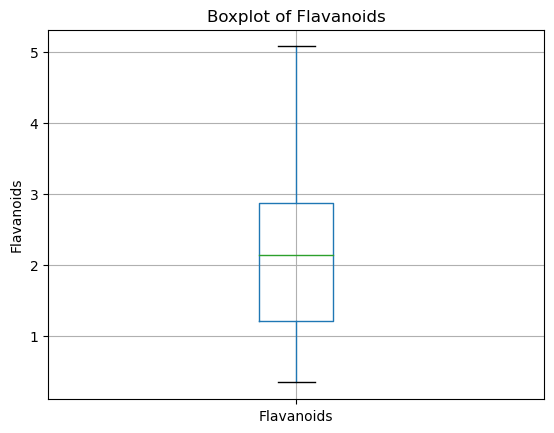

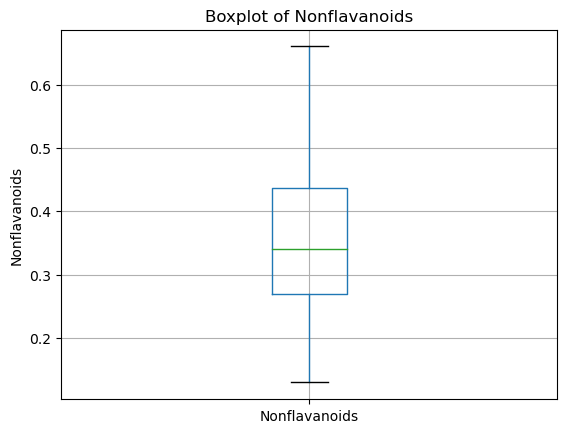

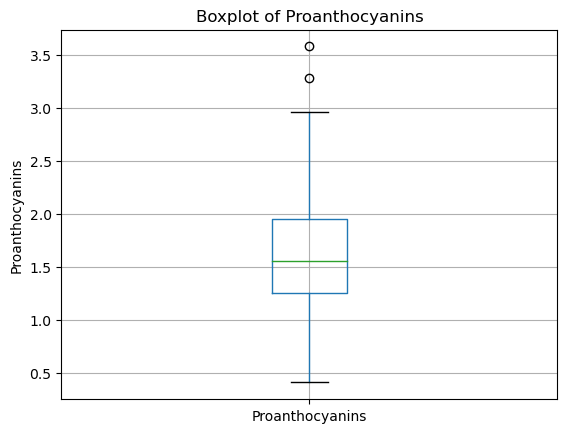

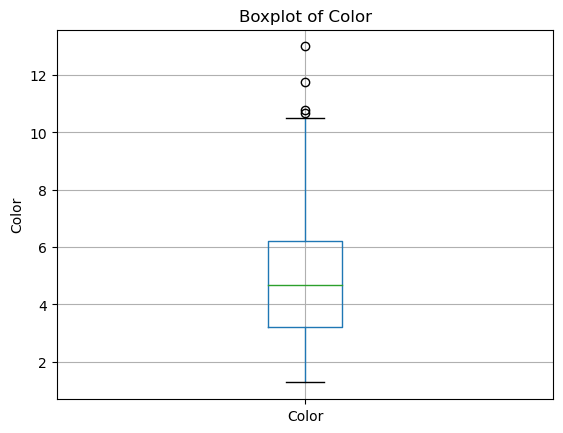

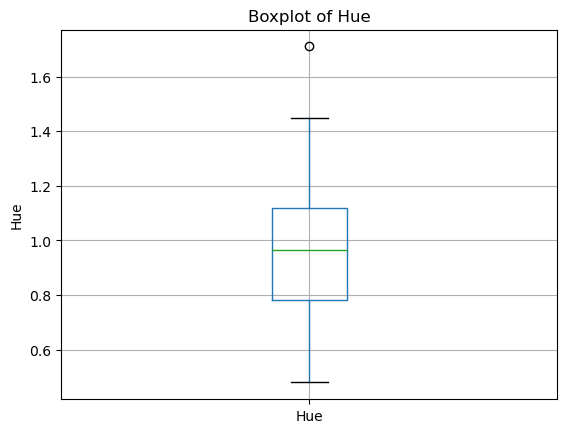

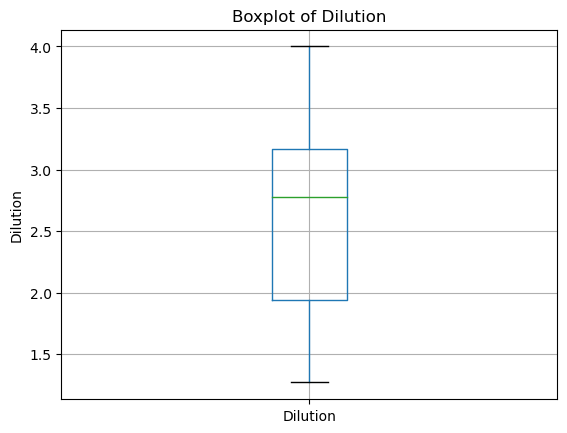

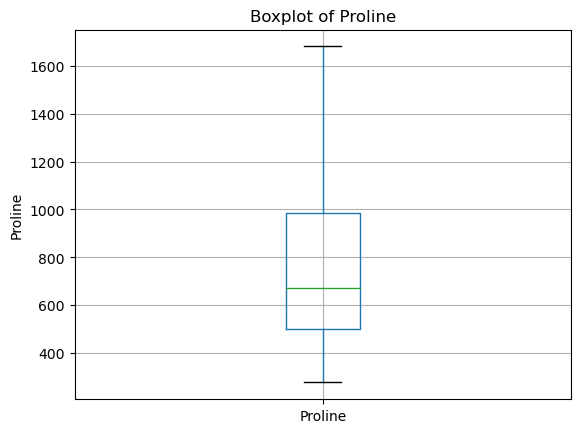

In [10]:
for cols in col:
    plt.title(f'Boxplot of {cols}')
    x.boxplot(column = [cols])
    plt.ylabel(cols)
    plt.show()

In [11]:
outlier_counts = {}

for column in x.select_dtypes(include='number').columns:
    Q1 = x[column].quantile(0.25)
    Q3 = x[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outlier_count = x[(x[column] < lower) | (x[column] > upper)].shape[0]
    outlier_counts[column] = outlier_count

# Print result
for col, count in outlier_counts.items():
    print(f"{col}: {count} outliers")

Alcohol: 0 outliers
Malic: 3 outliers
Ash: 3 outliers
Alcalinity: 4 outliers
Magnesium: 4 outliers
Phenols: 0 outliers
Flavanoids: 0 outliers
Nonflavanoids: 0 outliers
Proanthocyanins: 2 outliers
Color: 4 outliers
Hue: 1 outliers
Dilution: 0 outliers
Proline: 0 outliers


In [12]:
def winsorize_iqr(data):
    numeric_cols = data.select_dtypes(include='number').columns

    for col in numeric_cols:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        data[col] = data[col].clip(lower, upper)

    return data

In [13]:
x = winsorize_iqr(x)

In [14]:
col = x.select_dtypes(include= ['float','int']).columns
col

Index(['Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')

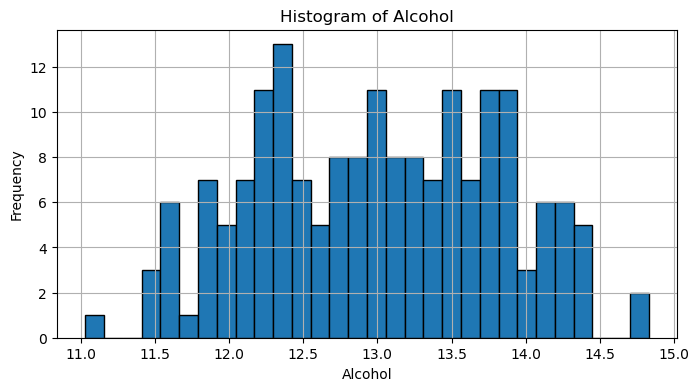

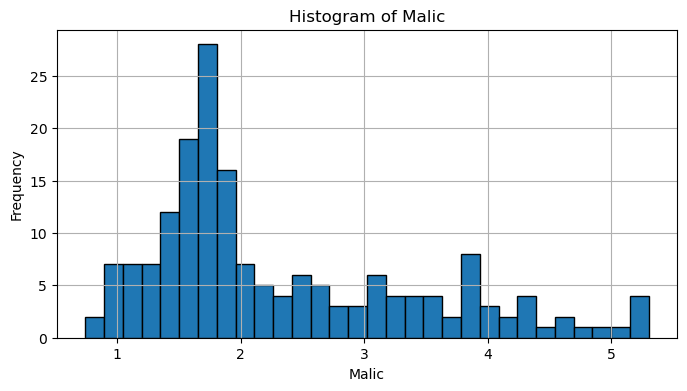

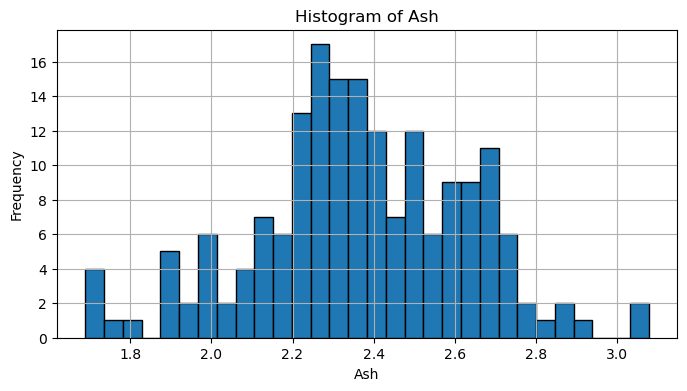

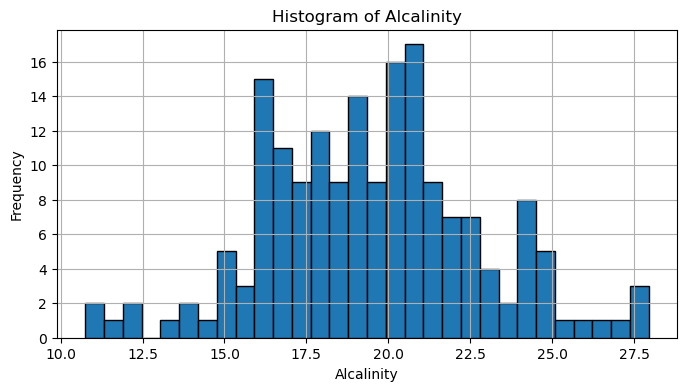

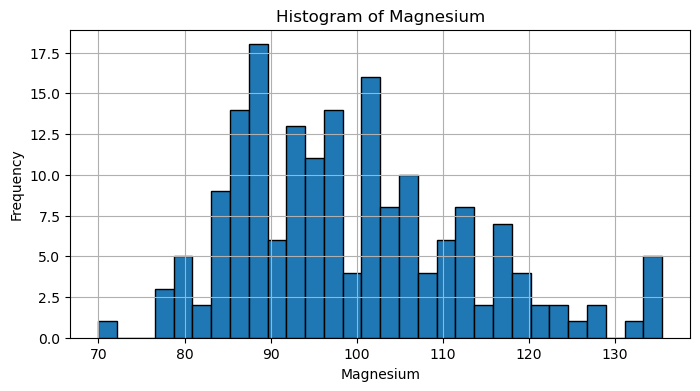

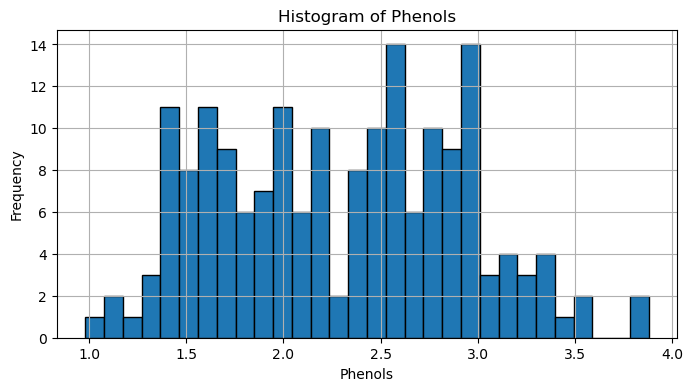

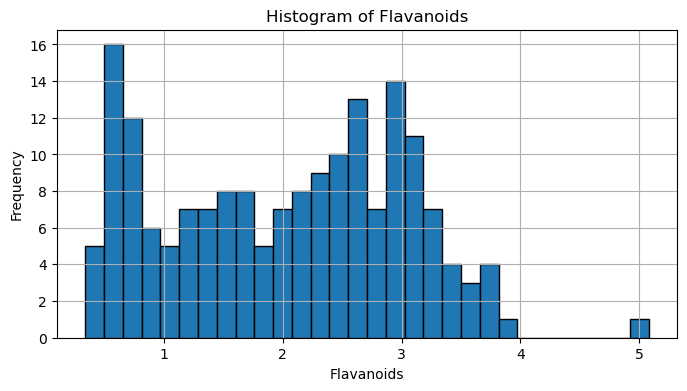

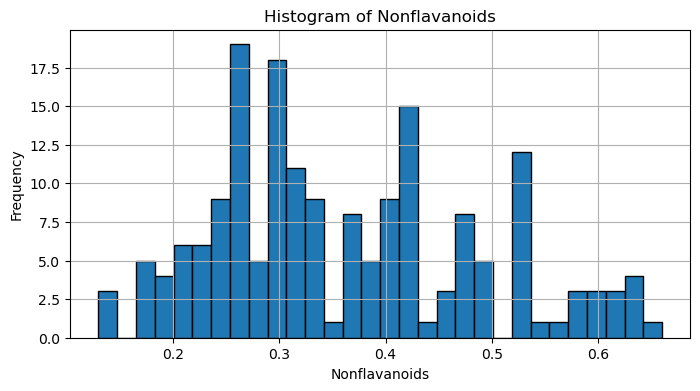

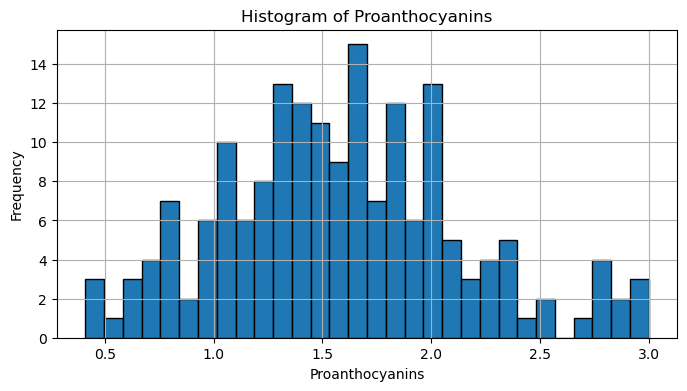

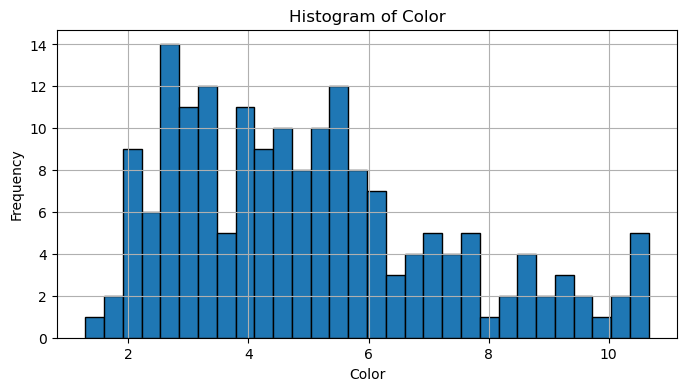

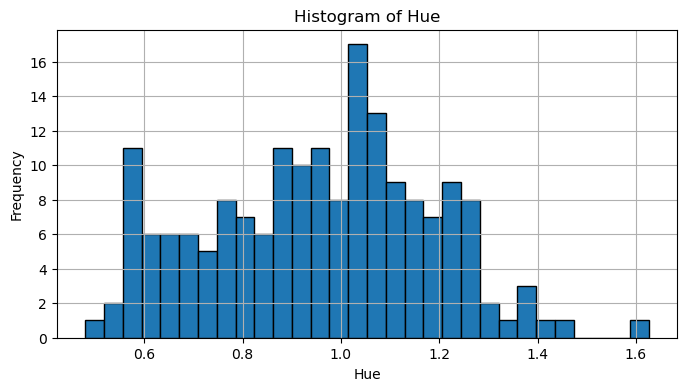

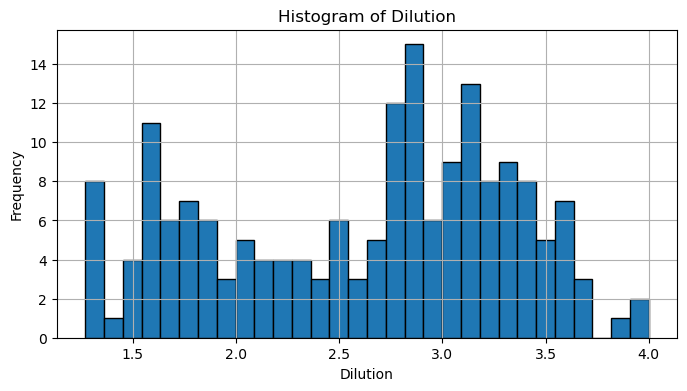

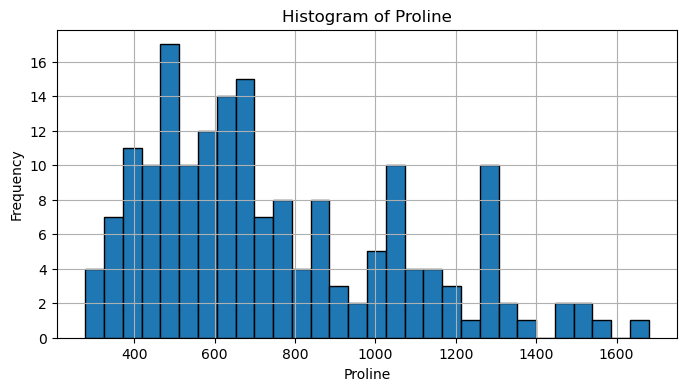

In [15]:
for cols in col:
    plt.figure(figsize=(8, 4))
    plt.hist(x[cols], bins=30, edgecolor='black')
    plt.title(f'Histogram of {cols}')
    plt.xlabel(cols)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

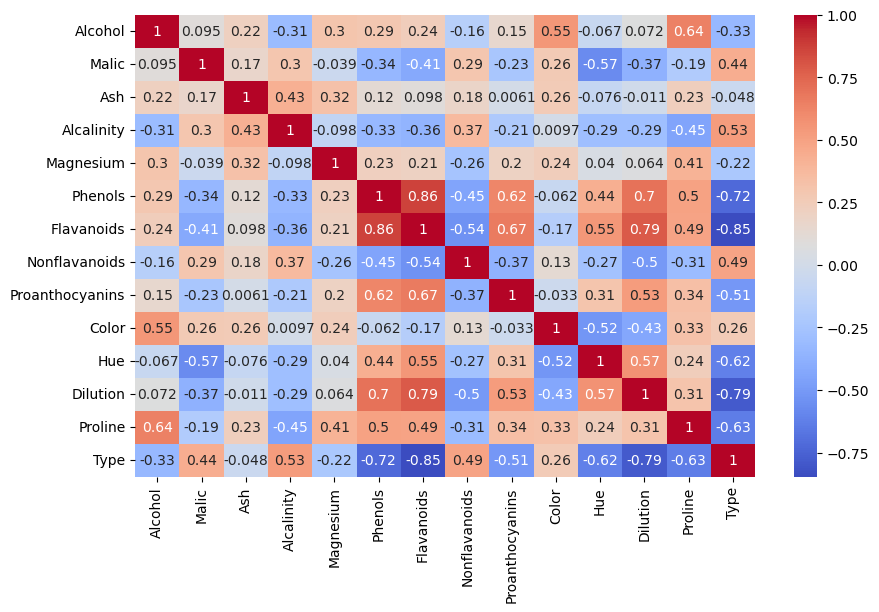

In [16]:
data = pd.concat([x,y],axis = 1)
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

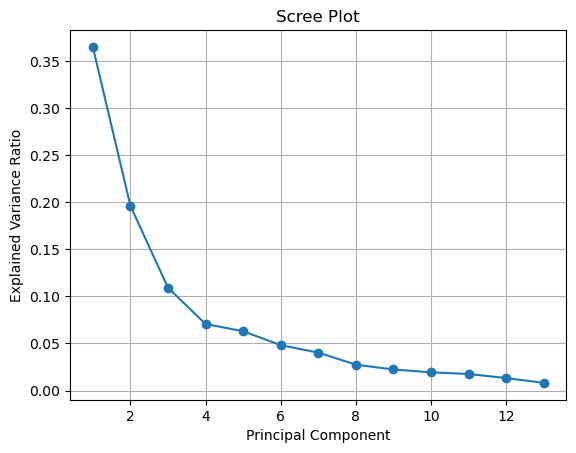

In [23]:
from sklearn.decomposition import PCA


pca = PCA()
X_pca = pca.fit_transform(x)

# Scree plot
plt.plot(range(1, len(pca.explained_variance_ratio_)+1),
         pca.explained_variance_ratio_, marker='o')
plt.title("Scree Plot")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.grid(True)
plt.show()

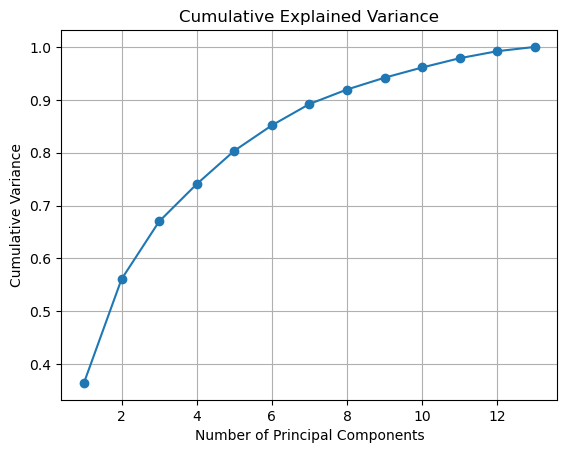

In [24]:
import numpy as np

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Variance")
plt.grid(True)
plt.show()

In [49]:
pca = PCA(n_components=4)
X_pca = pca.fit_transform(x)

X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

In [60]:
from sklearn.cluster import KMeans

#Fit KMeans model
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(x)

KMeans(n_clusters=4, random_state=42)

In [61]:
from sklearn.metrics import silhouette_score
silhouette_score(x, kmeans.labels_)

0.25239722030291983

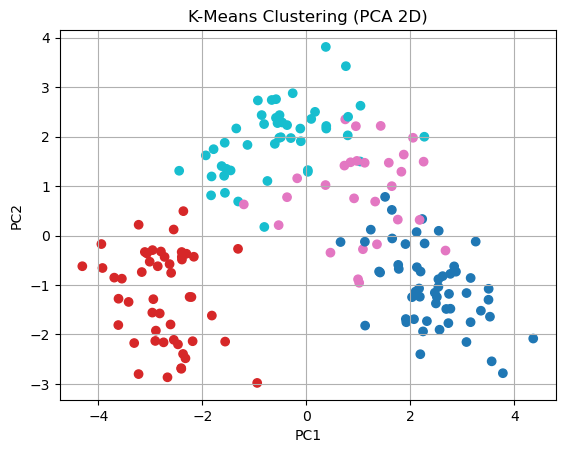

In [62]:
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_vis = pca.fit_transform(x)

plt.scatter(X_vis[:, 0], X_vis[:, 1], c=kmeans.labels_, cmap='tab10')
plt.title("K-Means Clustering (PCA 2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()

In [57]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_pca_df)

KMeans(n_clusters=4, random_state=42)

In [58]:
from sklearn.metrics import silhouette_score
silhouette_score(X_pca_df, kmeans.labels_)

0.3650893662391131

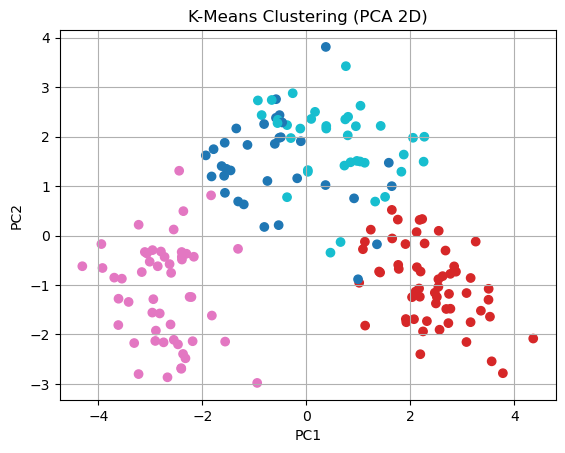

In [59]:
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_vis = pca.fit_transform(X_pca_df)

plt.scatter(X_vis[:, 0], X_vis[:, 1], c=kmeans.labels_, cmap='tab10')
plt.title("K-Means Clustering (PCA 2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()

## 5th Task
1.) Clustering on PCA-transformed data gave better results than on the original data. The silhouette score improved from 0.252 to 0.365, showing that the clusters were more clearly separated and compact after reducing dimensions.

2.) Both clustering results used the same number of clusters (k=4), but the groupings were different. The PCA-transformed clusters looked more well-formed and distinct, while the original data had more overlap and less defined cluster boundaries.

3.) PCA helped improve clustering performance by removing noise and reducing redundancy in the features. It made the data easier for KMeans to separate into clear groups, resulting in better clustering quality.

4.) Using PCA improves clustering but reduces interpretability because principal components don't directly represent original features. Clustering on original data keeps feature meaning but may be affected by noise or irrelevant variables. It's a trade-off between performance and clarity.

## 6th Task

2.) Using PCA before clustering can make patterns in data clearer by reducing noise and combining related features. It helps clustering algorithms like KMeans find better groupings, especially in high-dimensional data. However, PCA also makes it harder to understand the meaning of each feature, since principal components are combinations of original features.

3.)Use PCA with clustering when your dataset has many features or when clusters are not well-separated. It can improve performance and simplify complex data. Use clustering without PCA when feature meaning is important and the dataset has fewer dimensions or is already clean. Choose based on whether you value performance or interpretability more in your analysis.